In [1]:
import fastbook
fastbook.setup_book()
from IPython.display import display

C:\Python399\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Python399\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")
C:\Python399\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
torch.cuda.empty_cache()

In [4]:
flower_types = 'daisy','dandelion','rose','sunflower','tulip'
path = Path('../datasets/flowers')

fns = get_image_files(path)

failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

In [6]:
import sys,os

# Dataframe creation based on the photos splitted in each folder
df = pd.DataFrame(columns=['fname','label','fpath'])
fnames=[]
labels=[]
fpath=[]
for r,d,f in os.walk(path):
    for file in f:
        fnames.append(parent_label(r+'\\'+file)+os.path.join(file))#,parent_label(r+'/'+file))
        fpath.append(r+'\\'+file)#,parent_label(r+'/'+file))
        labels.append(parent_label(r+'\\'+file).replace('_',' '))
        
df['fname'] = pd.Series(fnames)
df['label'] = pd.Series(labels)
df['fpath'] = pd.Series(fpath)
df

,fname,label,fpath
0,daisy100080576_f52e8ee070_n.jpg,daisy,..\datasets\flowers\daisy\100080576_f52e8ee070_n.jpg
1,daisy10140303196_b88d3d6cec.jpg,daisy,..\datasets\flowers\daisy\10140303196_b88d3d6cec.jpg
2,daisy10172379554_b296050f82_n.jpg,daisy,..\datasets\flowers\daisy\10172379554_b296050f82_n.jpg
3,daisy10172567486_2748826a8b.jpg,daisy,..\datasets\flowers\daisy\10172567486_2748826a8b.jpg
4,daisy10172636503_21bededa75_n.jpg,daisy,..\datasets\flowers\daisy\10172636503_21bededa75_n.jpg
...,...,...,...
4155,tulip9831362123_5aac525a99_n.jpg,tulip,..\datasets\flowers\tulip\9831362123_5aac525a99_n.jpg
4156,tulip9870557734_88eb3b9e3b_n.jpg,tulip,..\datasets\flowers\tulip\9870557734_88eb3b9e3b_n.jpg
4157,tulip9947374414_fdf1d0861c_n.jpg,tulip,..\datasets\flowers\tulip\9947374414_fdf1d0861c_n.jpg
4158,tulip9947385346_3a8cacea02_n.jpg,tulip,..\datasets\flowers\tulip\9947385346_3a8cacea02_n.jpg


In [8]:
def get_x(f): return f['fpath']
def get_y(f): return f['label'].split(' ')

In [9]:
flowers = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    # get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    get_x=get_x,
    item_tfms=RandomResizedCrop(128,min_scale=.35))

dls = flowers.dataloaders(df)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


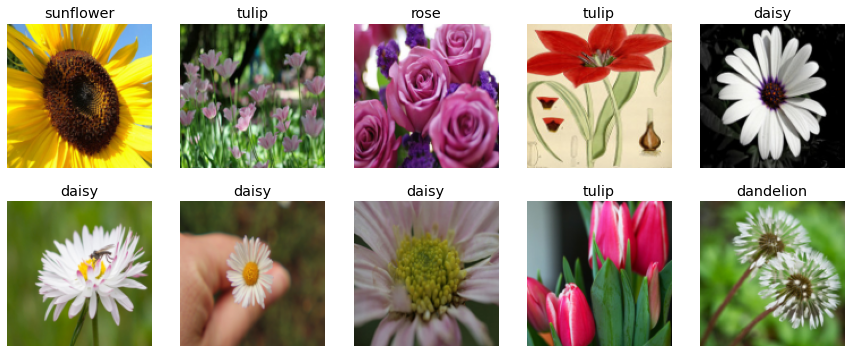

In [10]:
dls.valid.show_batch(max_n=10, nrows=2)

In [11]:
loss_func = nn.BCEWithLogitsLoss()


In [12]:
def accuracy_multi1(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when 'inp' and 'targ' are the same size"
    if sigmoid: inp=inp.sigmoid()
    return ((inp>thresh) == targ.bool()).float().mean()

In [14]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi,thresh=0.9))
learn.fine_tune(4,base_lr=3e-2,freeze_epochs=4)
# learn.lr_find(suggest_funcs=(minimum, steep))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.431136,0.202657,0.932452,00:22
1,0.227976,0.144953,0.946635,00:23
2,0.169475,0.201656,0.946875,00:23
3,0.147459,0.117361,0.955288,00:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.167340,0.328776,0.936538,00:27
1,0.152486,0.148195,0.940385,00:27
2,0.121789,0.093503,0.959135,00:27
3,0.084516,0.075854,0.966106,00:27


In [19]:
learn.predict('./frames/frame20.jpg')

((#1) ['rose'],
 TensorBase([False, False,  True, False, False]),
 TensorBase([0.0061, 0.0026, 0.5076, 0.0093, 0.3995]))